In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import smogn

%matplotlib inline

Data Loading

In [2]:
agrolimate_csv = './POWER_Regional_monthly_1981_2020_000d9857S_002d4905N_100d0750E_103d7500E_LST.csv'
prod_qty_csv = './FAOSTAT_data_prodQTY.csv'
yield_csv = './FAOSTAT_data_panen.csv'
harvested_csv = './FAOSTAT_data_area_harvested.csv'

AGROCLIMATE DATA

NASA/POWER CERES/MERRA2 Native Resolution Monthly and Annual 
Dates (month/day/year): 01/01/1981 through 12/31/2020 
Location: Regional 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = na meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
1. TS                   : MERRA-2 Earth Skin Temperature (C) 
2. T2M                  : MERRA-2 Temperature at 2 Meters (C) 
3. QV2M                 : MERRA-2 Specific Humidity at 2 Meters (g/kg) 
4. RH2M                 : MERRA-2 Relative Humidity at 2 Meters (%) 
5. T2MDEW               : MERRA-2 Dew/Frost Point at 2 Meters (C) 
6. T2MWET               : MERRA-2 Wet Bulb Temperature at 2 Meters (C) 
7. GWETTOP              : MERRA-2 Surface Soil Wetness (1) 
8. T2M_MAX              : MERRA-2 Temperature at 2 Meters Maximum (C) 
9. T2M_MIN              : MERRA-2 Temperature at 2 Meters Minimum (C) 
10. GWETPROF            : MERRA-2 Profile Soil Moisture (1) 
11. GWETROOT            : MERRA-2 Root Zone Soil Wetness (1) 
12. T2M_RANGE           : MERRA-2 Temperature at 2 Meters Range (C) 
13. PRECTOTCORR         : MERRA-2 Precipitation Corrected (mm/day) 
14. PRECTOTCORR_SUM     : MERRA-2 Precipitation Corrected Sum (mm) 
15. ALLSKY_SFC_LW_DWN   : CERES SYN1deg All Sky Surface Longwave Downward Irradiance (W/m^2)

FAOSTAT DATA

1.	Domain Code		        : Kode domain data.
2.	Domain			        : Nama domain data.
3.	Area Code (M49)	        :  Kode area.
4.	Area			        : Nama Negara.
5.	Element Code		    : Kode element.
6.	Element		            : Komponen, Area Harvested.
7.	Item Code (CPC)	        : Kode produk.
8.	Item			        : Nama jenis produk.
9.	Year Code		        : Kode tahun.
10.	Year			        : Tahun.
11.	Unit			        : Satuan unit, Ha (hektar).
12.	Value			        : Nilai data.
13.	Flag			        : Binary (E/A)
14.	Flag Description		: Deskripsi Flag. E = Estimated Value, A = Official Figure


In [3]:
# Reading dataset from source

from pandas import read_csv

agrolimate_data = read_csv(agrolimate_csv)
prod_qty_data = read_csv(prod_qty_csv)
yield_data = read_csv(yield_csv)
harvested_data = read_csv(harvested_csv)

In [4]:
# Creating Dataframe

agrolimate_df = pd.DataFrame(agrolimate_data)
prod_qty_df = pd.DataFrame(prod_qty_data)
yield_df = pd.DataFrame(yield_data)
harvested_df = pd.DataFrame(harvested_data)

Droping unnececary column

In [5]:
prod_qty_df = prod_qty_df.filter(['Production Quantity'])
yield_df = yield_df.filter(['Crop Yield'])
harvested_df = harvested_df.filter(['Harvested Area'])
agrolimate_df = agrolimate_df.filter(['PARAMETER', 'YEAR', 'LAT', 'LON', 'ANN'])

In [6]:
# separating agroclimate data based on parameter
# this code is stupid better loop this instead doing one by one - m1
# idc you do that instead - m2

TS_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'TS'].reset_index(drop=True)
T2M_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2M'].reset_index(drop=True)
QV2M_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'QV2M'].reset_index(drop=True)
RH2M_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'RH2M'].reset_index(drop=True)
T2MDEW_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2MDEW'].reset_index(drop=True)
T2MWET_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2MWET'].reset_index(drop=True)
GWETTOP_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'GWETTOP'].reset_index(drop=True)
T2M_MAX_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2M_MAX'].reset_index(drop=True)
T2M_MIN_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2M_MIN'].reset_index(drop=True)
GWETPROF_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'GWETPROF'].reset_index(drop=True)
GWETROOT_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'GWETROOT'].reset_index(drop=True)
T2M_RANGE_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2M_RANGE'].reset_index(drop=True)
PRECTOTCORR_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'PRECTOTCORR'].reset_index(drop=True)
PRECTOTCORR_SUM_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'PRECTOTCORR_SUM'].reset_index(drop=True)
ALLSKY_SFC_LW_DWN_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'ALLSKY_SFC_LW_DWN'].reset_index(drop=True)

In [7]:
# create mean data for all longitude and latitude based on year
# this code is stupid better loop this instead doing one by one - m1
# idc you do that instead - m2

new_TS_df = pd.DataFrame(TS_df.groupby('YEAR').mean()['ANN'])
new_TS_df = new_TS_df.rename(columns={'ANN': 'TS'})
new_TS_df = new_TS_df.reset_index(drop=True)

new_T2M_df = pd.DataFrame(T2M_df.groupby('YEAR').mean()['ANN'])
new_T2M_df = new_T2M_df.rename(columns={'ANN': 'T2M'})
new_T2M_df = new_T2M_df.reset_index(drop=True)

new_QV2M_df = pd.DataFrame(QV2M_df.groupby('YEAR').mean()['ANN'])
new_QV2M_df = new_QV2M_df.rename(columns={'ANN': 'QV2M'})
new_QV2M_df = new_QV2M_df.reset_index(drop=True)

new_RH2M_df = pd.DataFrame(RH2M_df.groupby('YEAR').mean()['ANN'])
new_RH2M_df = new_RH2M_df.rename(columns={'ANN': 'RH2M'})
new_RH2M_df = new_RH2M_df.reset_index(drop=True)

new_T2MDEW_df = pd.DataFrame(T2MDEW_df.groupby('YEAR').mean()['ANN'])
new_T2MDEW_df = new_T2MDEW_df.rename(columns={'ANN': 'T2MDEW'})
new_T2MDEW_df = new_T2MDEW_df.reset_index(drop=True)

new_T2MWET_df = pd.DataFrame(T2MWET_df.groupby('YEAR').mean()['ANN'])
new_T2MWET_df = new_T2MWET_df.rename(columns={'ANN': 'T2MWET'})
new_T2MWET_df = new_T2MWET_df.reset_index(drop=True)

new_GWETTOP_df = pd.DataFrame(GWETTOP_df.groupby('YEAR').mean()['ANN'])
new_GWETTOP_df = new_GWETTOP_df.rename(columns={'ANN': 'GWETTOP'})
new_GWETTOP_df = new_GWETTOP_df.reset_index(drop=True)

new_T2M_MAX_df = pd.DataFrame(T2M_MAX_df.groupby('YEAR').mean()['ANN'])
new_T2M_MAX_df = new_T2M_MAX_df.rename(columns={'ANN': 'T2M_MAX'})
new_T2M_MAX_df = new_T2M_MAX_df.reset_index(drop=True)

new_T2M_MIN_df = pd.DataFrame(T2M_MIN_df.groupby('YEAR').mean()['ANN'])
new_T2M_MIN_df = new_T2M_MIN_df.rename(columns={'ANN': 'T2M_MIN'})
new_T2M_MIN_df = new_T2M_MIN_df.reset_index(drop=True)

new_GWETPROF_df = pd.DataFrame(GWETPROF_df.groupby('YEAR').mean()['ANN'])
new_GWETPROF_df = new_GWETPROF_df.rename(columns={'ANN': 'GWETPROF'})
new_GWETPROF_df = new_GWETPROF_df.reset_index(drop=True)

new_GWETROOT_df = pd.DataFrame(GWETROOT_df.groupby('YEAR').mean()['ANN'])
new_GWETROOT_df = new_GWETROOT_df.rename(columns={'ANN': 'GWETROOT'})
new_GWETROOT_df = new_GWETROOT_df.reset_index(drop=True)

new_T2M_RANGE_df = pd.DataFrame(T2M_RANGE_df.groupby('YEAR').mean()['ANN'])
new_T2M_RANGE_df = new_T2M_RANGE_df.rename(columns={'ANN': 'T2M_RANGE'})
new_T2M_RANGE_df = new_T2M_RANGE_df.reset_index(drop=True)

new_PRECTOTCORR_df = pd.DataFrame(PRECTOTCORR_df.groupby('YEAR').mean()['ANN'])
new_PRECTOTCORR_df = new_PRECTOTCORR_df.rename(columns={'ANN': 'PRECTOTCORR'})
new_PRECTOTCORR_df = new_PRECTOTCORR_df.reset_index(drop=True)

new_PRECTOTCORR_SUM_df = pd.DataFrame(PRECTOTCORR_SUM_df.groupby('YEAR').mean()['ANN'])
new_PRECTOTCORR_SUM_df = new_PRECTOTCORR_SUM_df.rename(columns={'ANN': 'PRECTOTCORR_SUM'})
new_PRECTOTCORR_SUM_df = new_PRECTOTCORR_SUM_df.reset_index(drop=True)

new_ALLSKY_SFC_LW_DWN_df = pd.DataFrame(ALLSKY_SFC_LW_DWN_df.groupby('YEAR').mean()['ANN'])
new_ALLSKY_SFC_LW_DWN_df = new_ALLSKY_SFC_LW_DWN_df.rename(columns={'ANN': 'ALLSKY_SFC_LW_DWN'})
new_ALLSKY_SFC_LW_DWN_df = new_ALLSKY_SFC_LW_DWN_df.reset_index(drop=True)

C:\Users\malik\AppData\Local\Temp\ipykernel_14436\2686441713.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_TS_df = pd.DataFrame(TS_df.groupby('YEAR').mean()['ANN'])
C:\Users\malik\AppData\Local\Temp\ipykernel_14436\2686441713.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_T2M_df = pd.DataFrame(T2M_df.groupby('YEAR').mean()['ANN'])
C:\Users\malik\AppData\Local\Temp\ipykernel_14436\2686441713.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colum

Merge Dataframes into one Dataframe

In [8]:
# merginr newly created agroclimate data frame

agroclimate_merge = [
    new_TS_df,
    new_T2M_df,
    new_QV2M_df,
    new_RH2M_df,
    new_T2MDEW_df,
    new_T2MWET_df,
    new_GWETTOP_df,
    new_T2M_MAX_df,
    new_T2M_MIN_df,
    new_GWETPROF_df,
    new_GWETROOT_df,
    new_T2M_RANGE_df,
    new_PRECTOTCORR_df,
    new_PRECTOTCORR_SUM_df,
    new_ALLSKY_SFC_LW_DWN_df
]

new_agroclimate_df = pd.concat(agroclimate_merge, axis=1)

In [9]:
merge = [new_agroclimate_df, prod_qty_df, harvested_df, yield_df]

data = pd.concat(merge, axis=1)

In [10]:
data.sample(20)

,TS,T2M,QV2M,RH2M,T2MDEW,T2MWET,GWETTOP,T2M_MAX,T2M_MIN,GWETPROF,GWETROOT,T2M_RANGE,PRECTOTCORR,PRECTOTCORR_SUM,ALLSKY_SFC_LW_DWN,Production Quantity,Harvested Area,Crop Yield
34,26.658929,26.458036,18.665179,86.305179,23.874464,25.167321,0.843036,31.413929,21.655000,0.883214,0.855893,9.758750,6.151071,2171.046250,419.313929,183364519,10754801,170496
31,26.400893,26.224821,18.527321,86.728036,23.739464,24.981429,0.889286,31.211429,21.967679,0.930179,0.915000,9.243036,7.262143,2589.973393,416.064643,165466793,9572715,172853
22,26.468393,26.180536,18.651071,87.532857,23.859286,25.020000,0.892679,31.065179,22.162679,0.929643,0.915536,8.902857,8.559821,3048.216250,418.442500,52600000,3040000,173026
2,26.578393,26.252321,18.164821,85.166607,23.427857,24.839643,0.810000,32.058750,21.546964,0.846429,0.808571,10.510536,6.065536,2130.430893,-999.000000,4600000,255300,180180
18,26.183929,25.886071,18.382679,87.691250,23.605179,24.745536,0.885714,30.751607,21.708214,0.925536,0.907857,9.042321,7.031607,2469.908393,421.937500,32775000,1847000,177450
19,26.266250,25.977500,18.433750,87.454107,23.645893,24.812143,0.869464,30.876964,21.664643,0.910357,0.883750,9.212500,6.858214,2421.138929,422.132500,36380000,2014000,180636
28,26.429286,26.230357,18.607143,87.021964,23.808393,25.018929,0.886429,31.211071,21.858571,0.926786,0.908393,9.353036,7.553214,2691.289643,417.351786,90000000,5370000,167598
15,26.228214,25.951964,18.398750,87.447857,23.616071,24.783571,0.871786,31.112143,21.339643,0.912321,0.890179,9.772857,6.700714,2369.798036,420.872143,24490000,1428350,171457
35,26.874821,26.664286,18.921071,86.345357,24.089107,25.376429,0.871786,31.911250,22.310714,0.911429,0.891964,9.600000,7.470893,2664.413214,419.430000,193047055,11201465,172341
20,26.310000,26.009643,18.530714,87.732679,23.736429,24.873214,0.900179,30.845000,21.642857,0.940714,0.928214,9.202500,7.198929,2533.227679,417.561786,40950000,2200000,186136


Exploratory Data Analysis & Preprocessing

In [11]:
# checking mising value

data.isnull().sum()

TS                     0
T2M                    0
QV2M                   0
RH2M                   0
T2MDEW                 0
T2MWET                 0
GWETTOP                0
T2M_MAX                0
T2M_MIN                0
GWETPROF               0
GWETROOT               0
T2M_RANGE              0
PRECTOTCORR            0
PRECTOTCORR_SUM        0
ALLSKY_SFC_LW_DWN      0
Production Quantity    0
Harvested Area         0
Crop Yield             0
dtype: int64

In [12]:
# Checking duplicated data

print(f'Duplicated data in data frame: {data.duplicated().sum()}')

Duplicated data in data frame: 0


In [13]:
# checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TS                   40 non-null     float64
 1   T2M                  40 non-null     float64
 2   QV2M                 40 non-null     float64
 3   RH2M                 40 non-null     float64
 4   T2MDEW               40 non-null     float64
 5   T2MWET               40 non-null     float64
 6   GWETTOP              40 non-null     float64
 7   T2M_MAX              40 non-null     float64
 8   T2M_MIN              40 non-null     float64
 9   GWETPROF             40 non-null     float64
 10  GWETROOT             40 non-null     float64
 11  T2M_RANGE            40 non-null     float64
 12  PRECTOTCORR          40 non-null     float64
 13  PRECTOTCORR_SUM      40 non-null     float64
 14  ALLSKY_SFC_LW_DWN    40 non-null     float64
 15  Production Quantity  40 non-null     int64

In [14]:
data.describe()

,TS,T2M,QV2M,RH2M,T2MDEW,T2MWET,GWETTOP,T2M_MAX,T2M_MIN,GWETPROF,GWETROOT,T2M_RANGE,PRECTOTCORR,PRECTOTCORR_SUM,ALLSKY_SFC_LW_DWN,Production Quantity,Harvested Area,Crop Yield
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01,4.000000e+01,40.000000
mean,26.420250,26.160643,18.466513,86.795384,23.685897,24.923406,0.858982,31.260009,21.661129,0.897170,0.874076,9.598754,6.944219,2458.534246,298.059661,7.791797e+07,4.483448e+06,178114.475000
std,0.241280,0.258844,0.315319,0.766211,0.281407,0.257911,0.040509,0.382600,0.370473,0.042967,0.052303,0.413784,0.973859,361.065071,376.787881,8.229456e+07,4.801609e+06,13845.334558
min,25.818393,25.514821,17.731250,85.045714,23.017679,24.274821,0.743571,30.475536,20.855714,0.769821,0.728571,8.902857,4.719643,1636.752857,-999.000000,3.800000e+06,2.300000e+05,151349.000000
25%,26.294375,26.011920,18.361696,86.440848,23.596563,24.825536,0.837768,31.000312,21.429777,0.875580,0.842500,9.250000,6.188170,2184.479018,416.051696,1.190286e+07,7.474420e+05,170960.500000
50%,26.400536,26.139018,18.529018,86.787054,23.737946,24.925804,0.869375,31.211250,21.659821,0.909196,0.885804,9.595179,7.230536,2555.870446,418.744643,3.866500e+07,2.107000e+06,172906.500000
75%,26.555045,26.275714,18.653482,87.426295,23.859643,25.040402,0.886429,31.437366,21.859152,0.927946,0.910268,9.812455,7.487679,2665.387946,420.906161,1.481071e+08,8.537252e+06,185866.000000
max,27.016964,26.764107,19.173929,88.182679,24.301429,25.506786,0.911964,32.128571,22.538393,0.951071,0.945714,10.510536,8.704464,3114.615000,424.791071,2.565286e+08,1.499601e+07,211947.000000


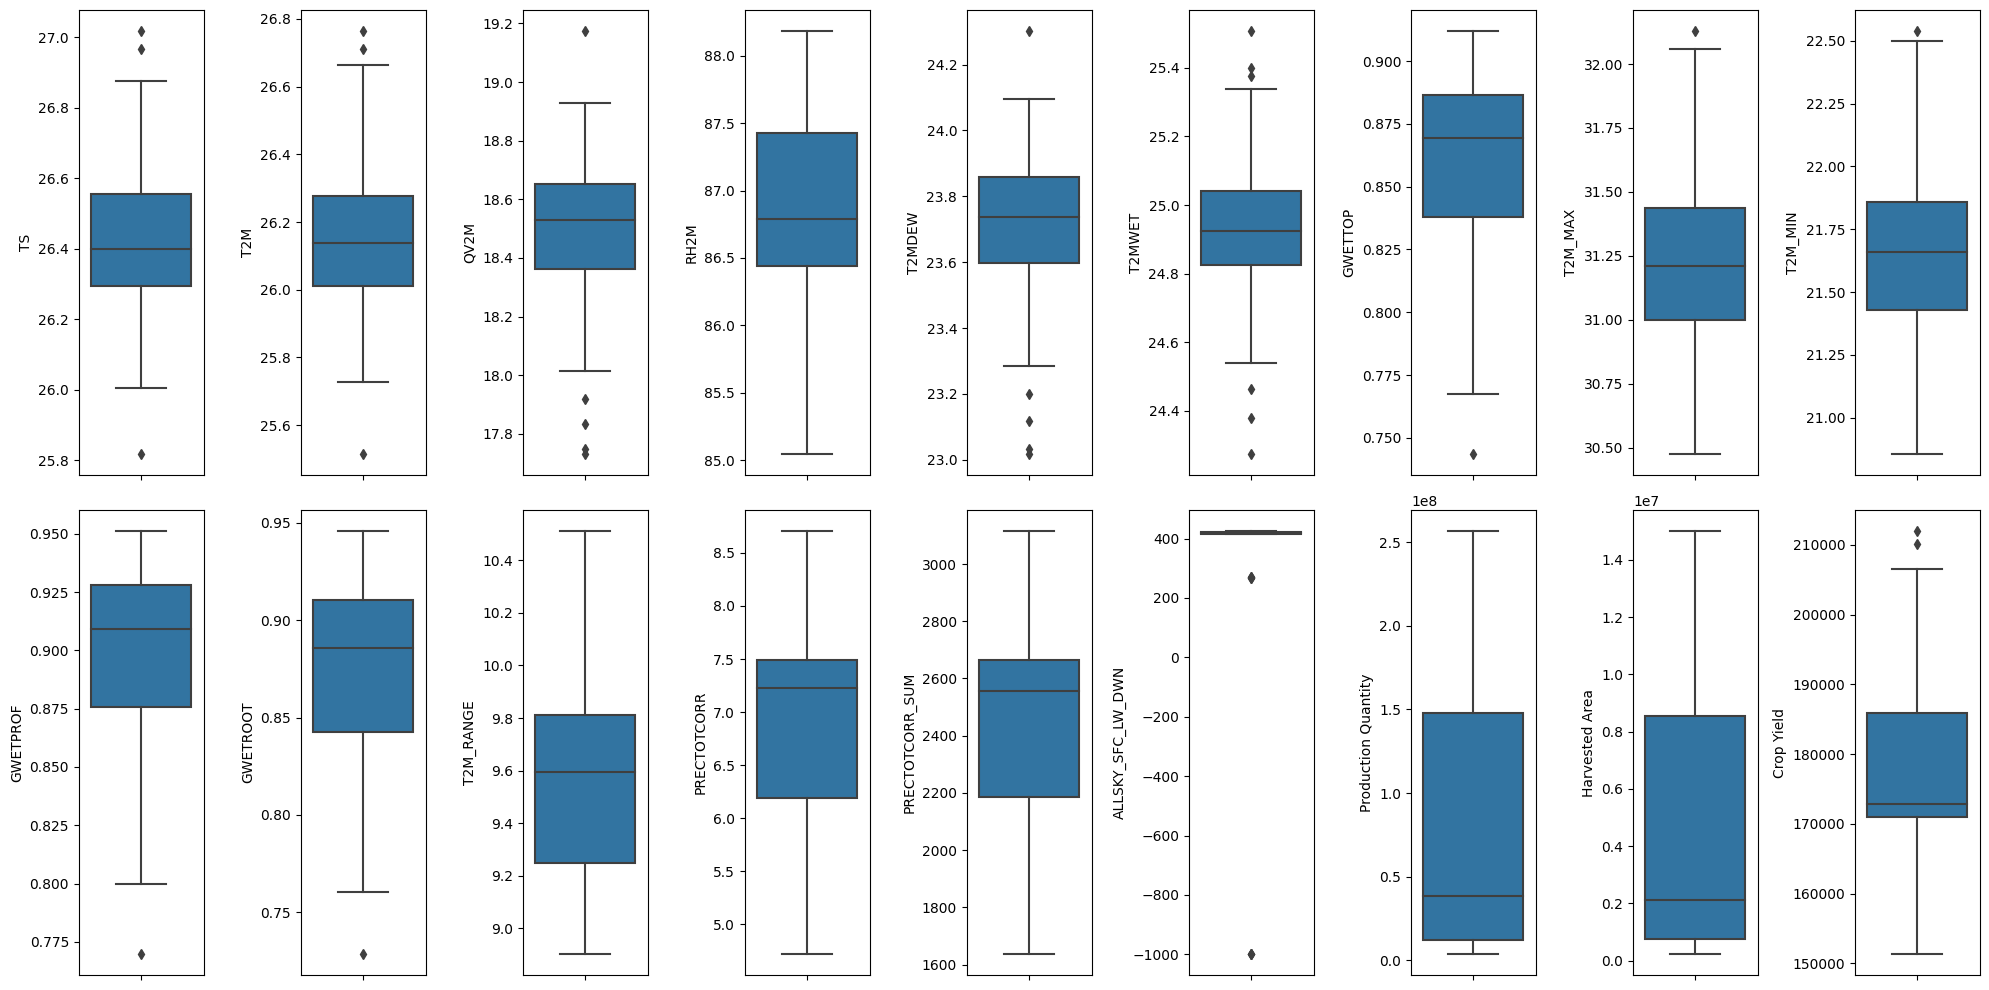

In [15]:
# checking the outliers

fig, axs = plt.subplots(ncols=9, nrows=2, figsize=(20, 10))
index=0
axs = axs.flatten()

for k, v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index+=1

plt.tight_layout()

In [16]:
# checking outlier percentage

for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1

    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]

    print('Column {} Outliers {:.2f}%'.format(k, perc))

Column TS Outliers 7.50%
Column T2M Outliers 7.50%
Column QV2M Outliers 12.50%
Column RH2M Outliers 0.00%
Column T2MDEW Outliers 12.50%
Column T2MWET Outliers 15.00%
Column GWETTOP Outliers 2.50%
Column T2M_MAX Outliers 2.50%
Column T2M_MIN Outliers 2.50%
Column GWETPROF Outliers 2.50%
Column GWETROOT Outliers 2.50%
Column T2M_RANGE Outliers 0.00%
Column PRECTOTCORR Outliers 0.00%
Column PRECTOTCORR_SUM Outliers 0.00%
Column ALLSKY_SFC_LW_DWN Outliers 17.50%
Column Production Quantity Outliers 0.00%
Column Harvested Area Outliers 0.00%
Column Crop Yield Outliers 5.00%


C:\Users\malik\AppData\Local\Temp\ipykernel_14436\2461719023.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\malik\AppData\Local\Temp\ipykernel_14436\2461719023.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\malik\AppData\Local\Temp\

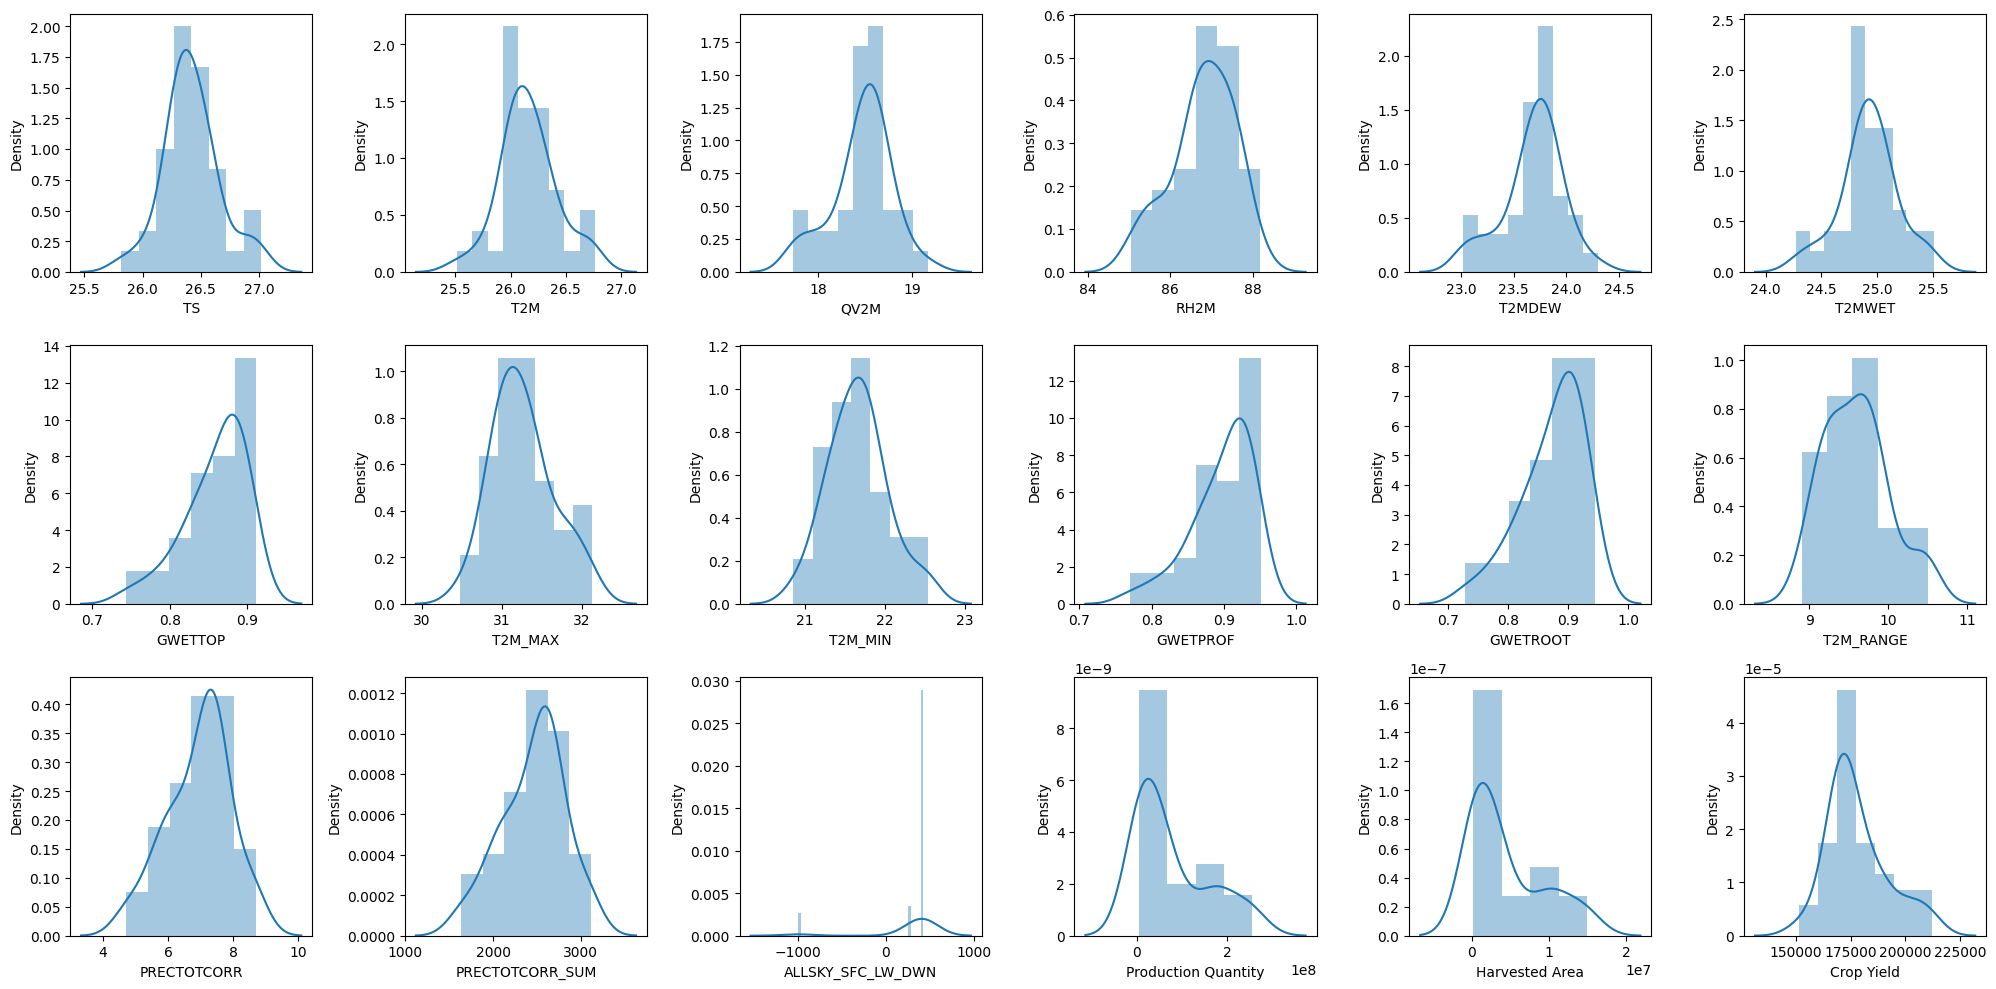

In [17]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
axs = axs.flatten()

for k, v in data.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout()

In [18]:
data = data.drop(columns=['ALLSKY_SFC_LW_DWN'])

In [19]:
# checking skewness & kurtosis

index = 0

for k, v in data.items():
  print('Feature {} Skewness = {:.7f}'.format(k, data[k].skew()))
  print('Feature {} Kurtosis = {:.7f}'.format(k, data[k].kurt()))
  index += 1

Feature TS Skewness = 0.3358891
Feature TS Kurtosis = 1.0478877
Feature T2M Skewness = 0.2459337
Feature T2M Kurtosis = 0.7178776
Feature QV2M Skewness = -0.5870545
Feature QV2M Kurtosis = 0.5866817
Feature RH2M Skewness = -0.5607859
Feature RH2M Kurtosis = -0.2270219
Feature T2MDEW Skewness = -0.6424421
Feature T2MDEW Kurtosis = 0.6390332
Feature T2MWET Skewness = -0.1940609
Feature T2MWET Kurtosis = 0.7846102
Feature GWETTOP Skewness = -1.0082362
Feature GWETTOP Kurtosis = 0.6495494
Feature T2M_MAX Skewness = 0.4645560
Feature T2M_MAX Kurtosis = -0.1361596
Feature T2M_MIN Skewness = 0.3136481
Feature T2M_MIN Kurtosis = 0.2762727
Feature GWETPROF Skewness = -1.1291623
Feature GWETPROF Kurtosis = 0.9822247
Feature GWETROOT Skewness = -0.9150779
Feature GWETROOT Kurtosis = 0.4161550
Feature T2M_RANGE Skewness = 0.5254863
Feature T2M_RANGE Kurtosis = -0.1805305
Feature PRECTOTCORR Skewness = -0.4187163
Feature PRECTOTCORR Kurtosis = -0.1455802
Feature PRECTOTCORR_SUM Skewness = -0.417871


 mu = 3.31 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


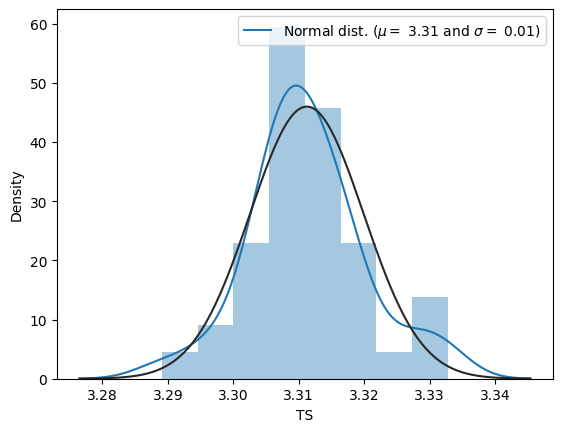

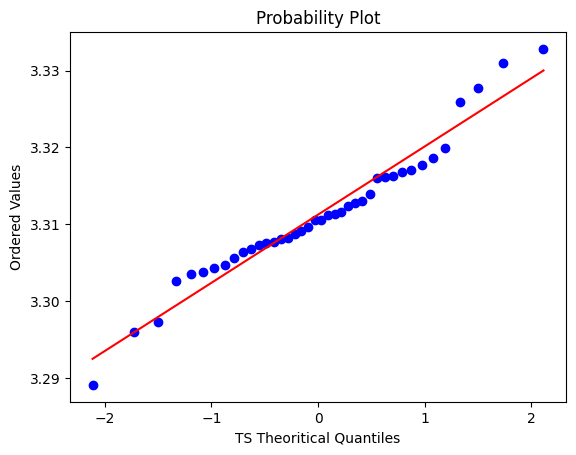


 mu = 3.30 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


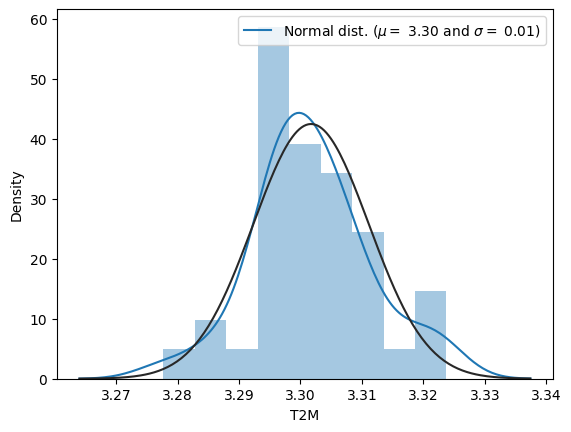

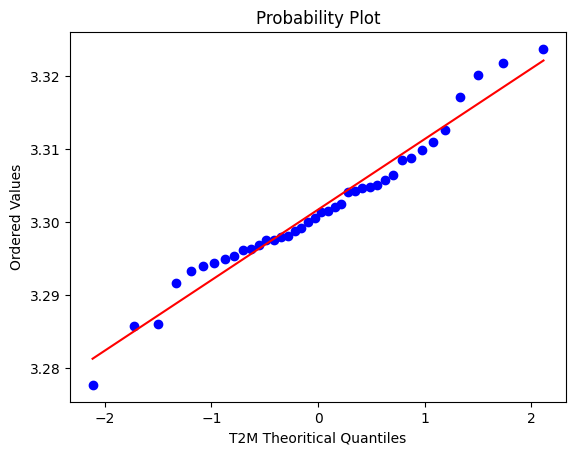


 mu = 2.97 and sigma = 0.02



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


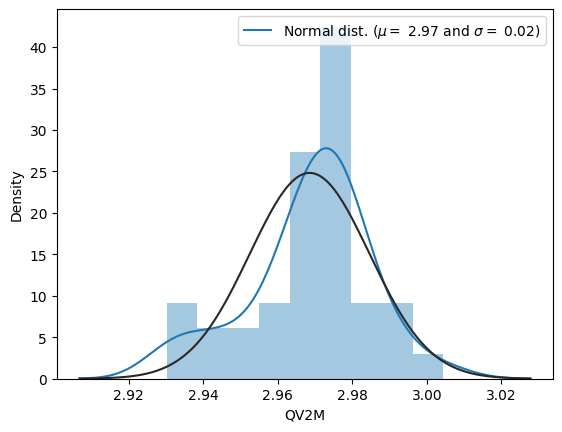

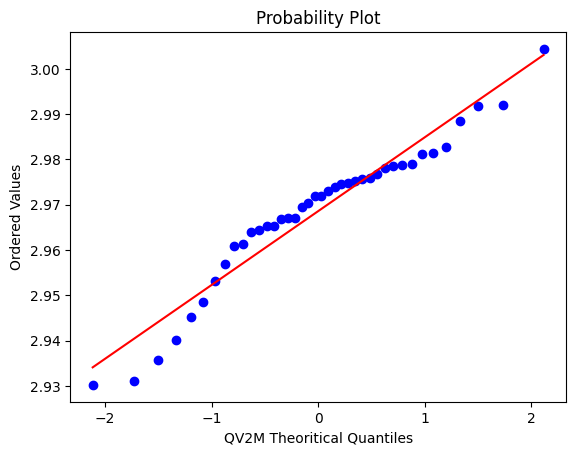


 mu = 4.47 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


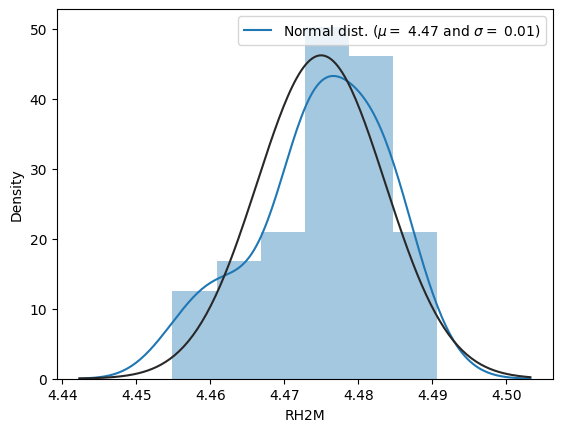

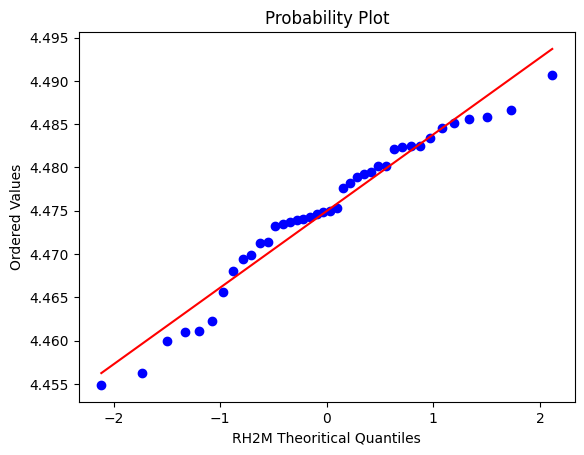


 mu = 3.21 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


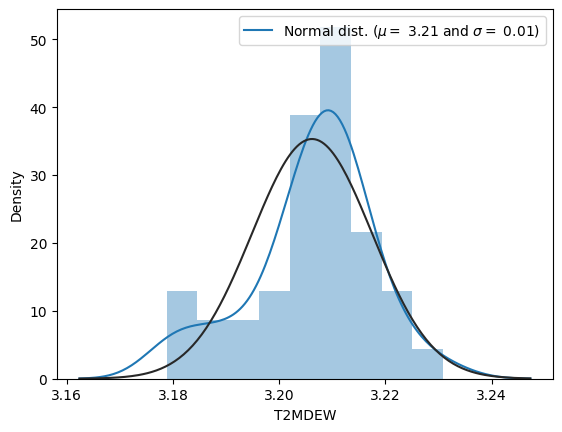

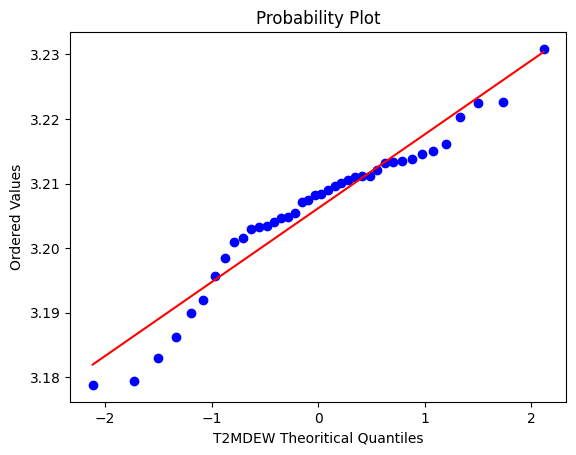


 mu = 3.26 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


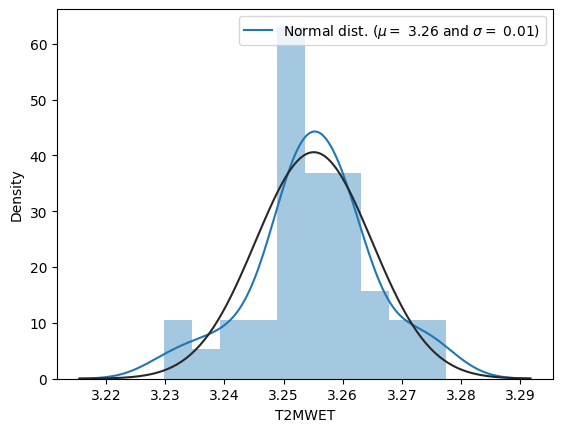

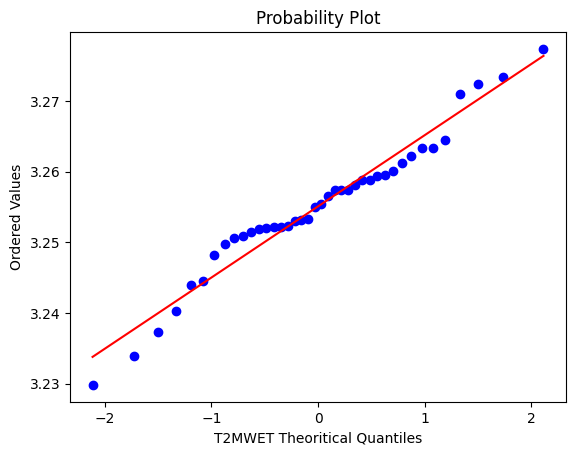


 mu = 0.62 and sigma = 0.02



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


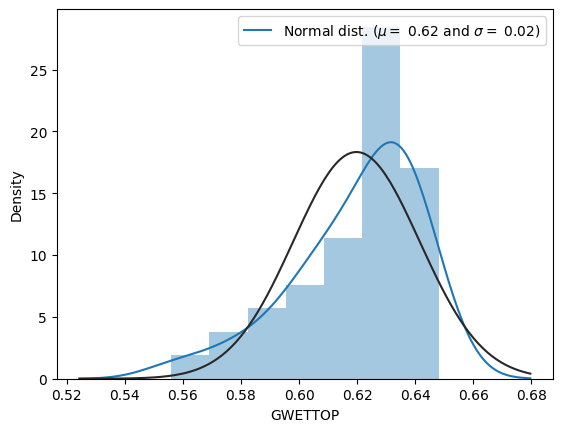

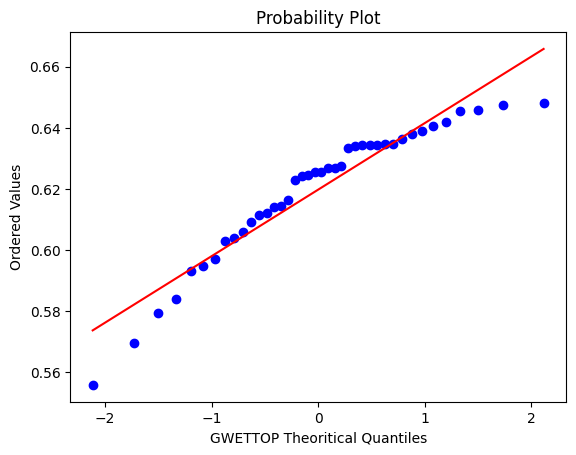


 mu = 3.47 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


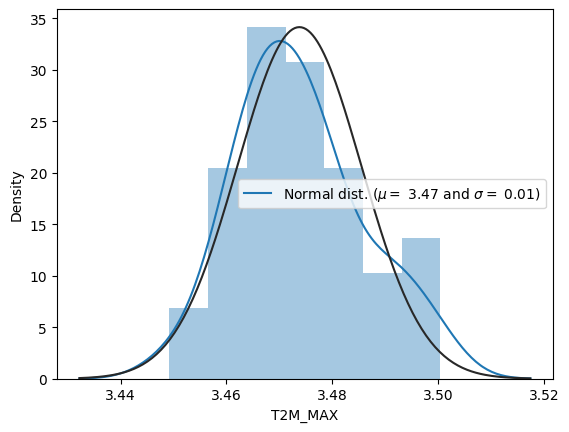

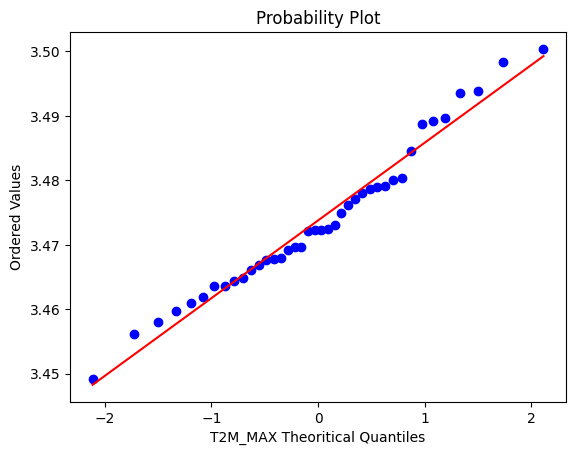


 mu = 3.12 and sigma = 0.02



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


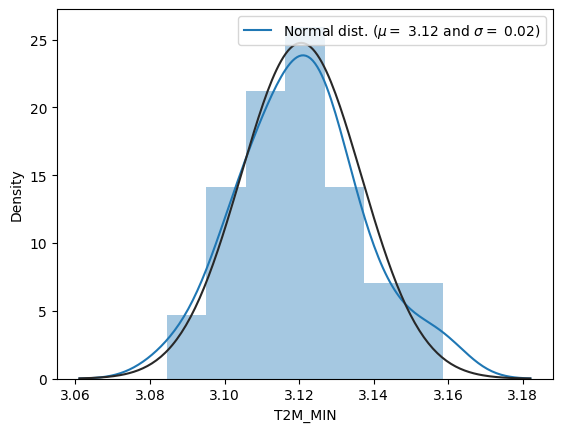

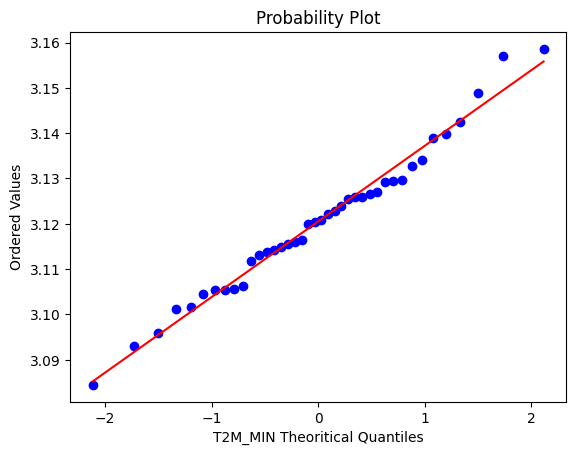


 mu = 0.64 and sigma = 0.02



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


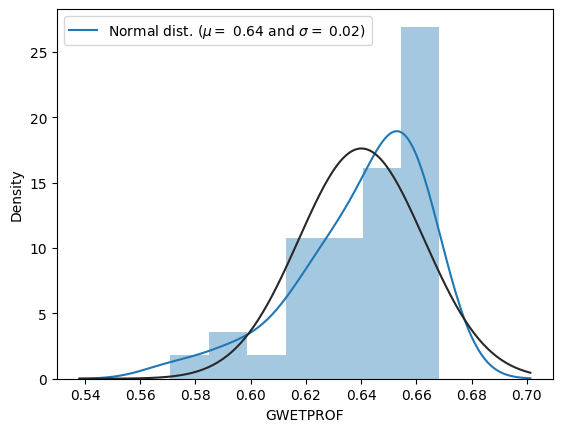

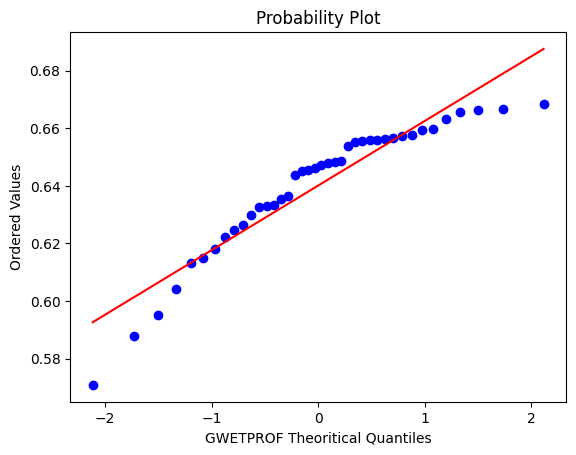


 mu = 0.63 and sigma = 0.03



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


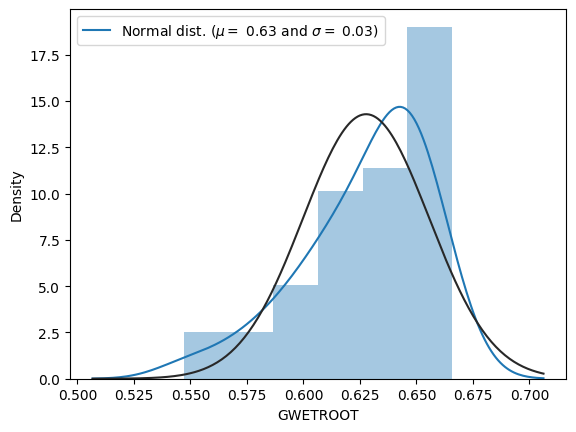

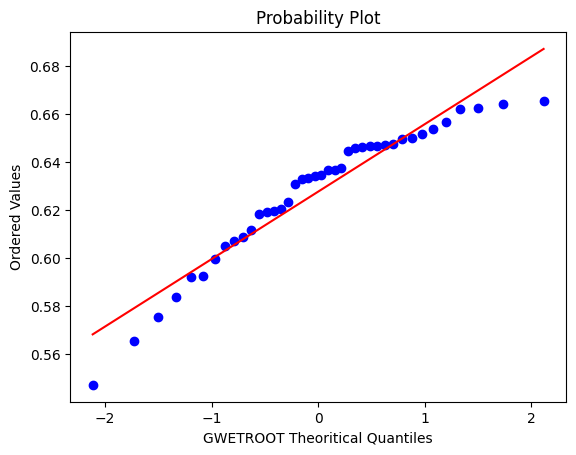


 mu = 2.36 and sigma = 0.04



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


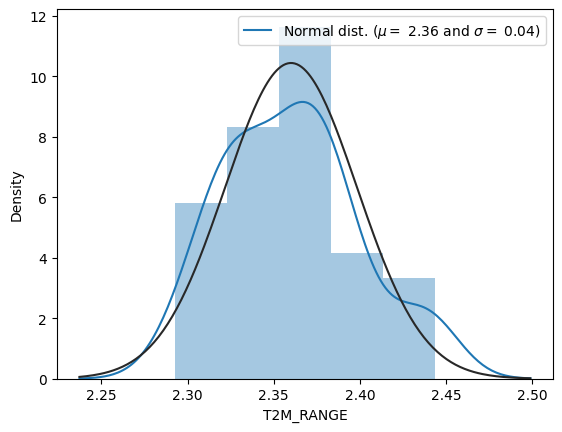

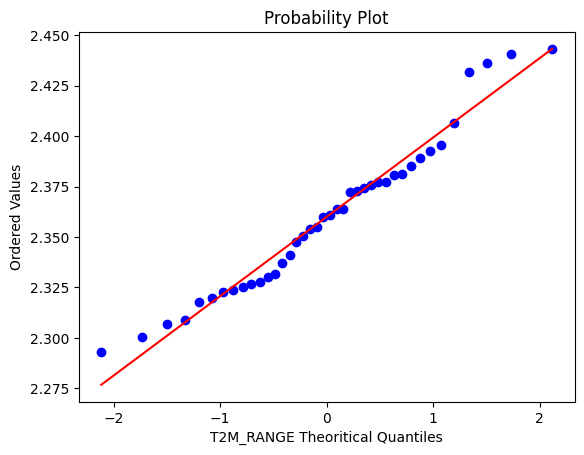


 mu = 2.06 and sigma = 0.13



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


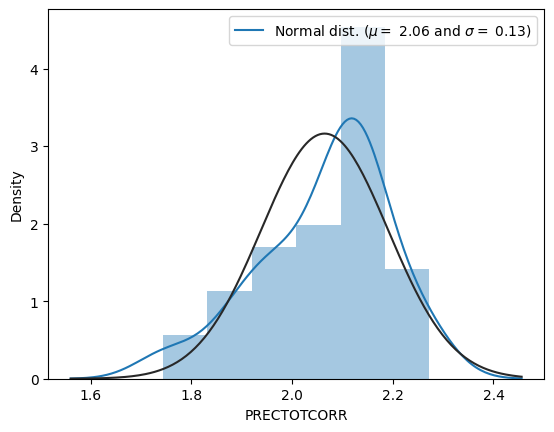

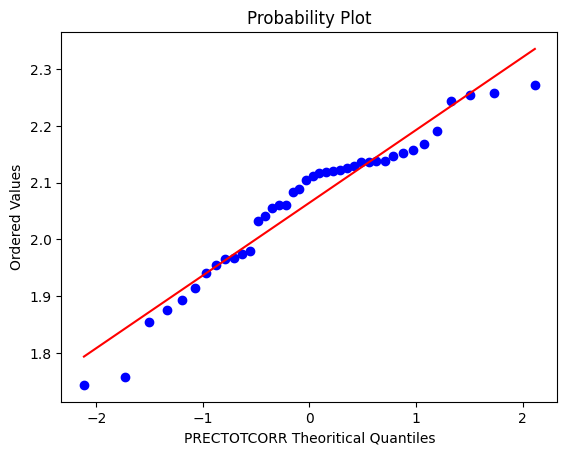


 mu = 7.80 and sigma = 0.15



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


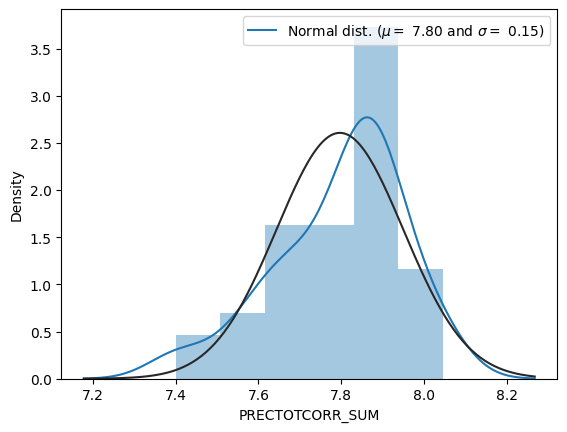

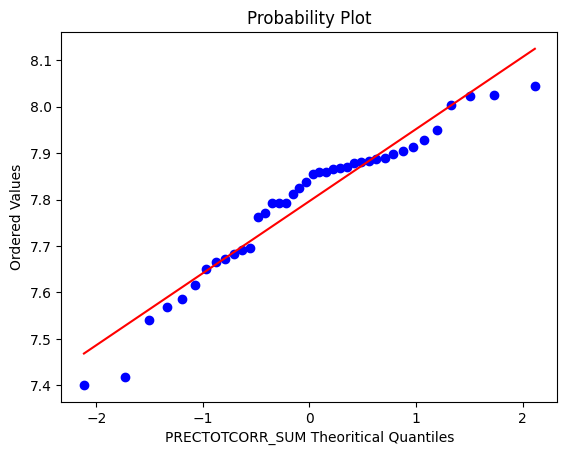


 mu = 17.47 and sigma = 1.30



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


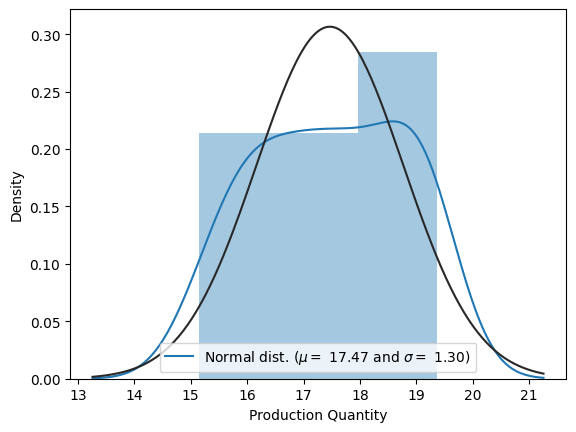

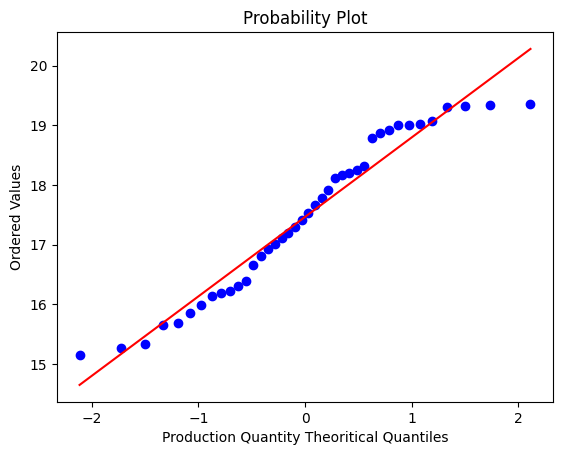


 mu = 14.59 and sigma = 1.32



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


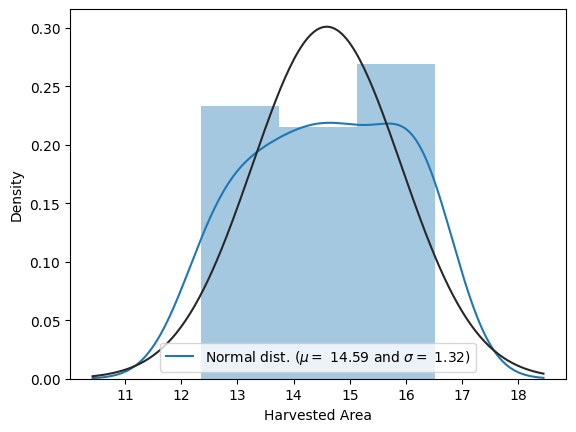

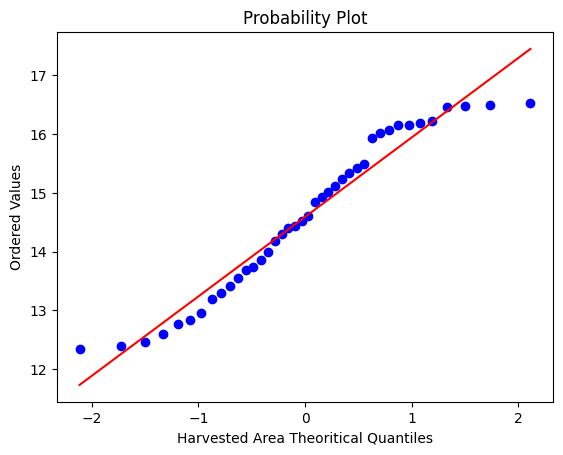


 mu = 12.09 and sigma = 0.07



C:\Users\malik\AppData\Local\Temp\ipykernel_14436\719428479.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


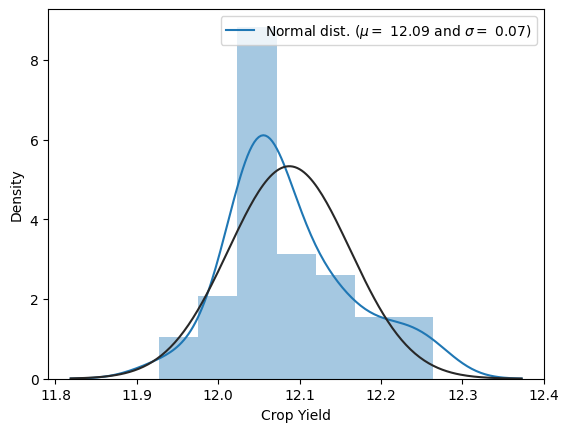

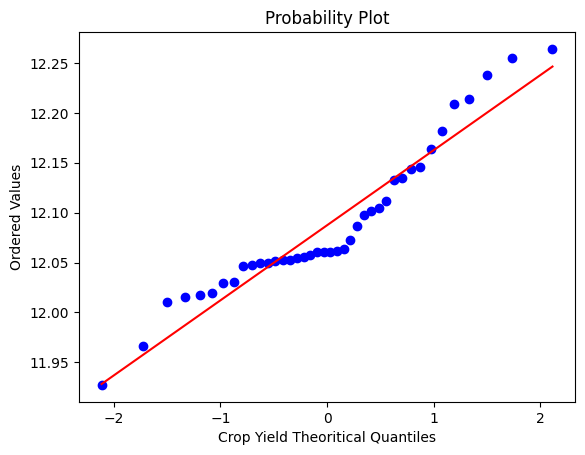

<Figure size 640x480 with 0 Axes>

In [20]:
# Checking distribution of data

from scipy import stats
from scipy.stats import norm, skew

fig, axs = plt.subplots()
index = 0

data = np.log1p(data)

for k, v in data.items():
  sns.distplot(data[k], fit=norm)

  (mu, sigma) = norm.fit(data[k])
  print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')

  fig = plt.figure()
  res = stats.probplot(data[k], plot=plt)
  plt.xlabel('{} Theoritical Quantiles'.format(k))
  plt.show()

  index += 1

plt.tight_layout()

In [347]:
# applying data augmentation using SMOGN algorithm

data_smogn = smogn.smoter(
    data=data,
    y='Crop Yield',
    k=10,
    pert=0.09,
    samp_method='extreme',
    rel_thres=1,
    )

c:\Users\malik\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\smoter.py:200: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  b_index.update({i: y_sort[bumps[i]:bumps[i + 1]]})
synth_matrix: 100%|##########| 2/2 [00:00<00:00, 12.94it/s]


In [348]:
data_smogn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 39
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TS                   73 non-null     float64
 1   T2M                  73 non-null     float64
 2   QV2M                 73 non-null     float64
 3   RH2M                 73 non-null     float64
 4   T2MDEW               73 non-null     float64
 5   T2MWET               73 non-null     float64
 6   GWETTOP              73 non-null     float64
 7   T2M_MAX              73 non-null     float64
 8   T2M_MIN              73 non-null     float64
 9   GWETPROF             73 non-null     float64
 10  GWETROOT             73 non-null     float64
 11  T2M_RANGE            73 non-null     float64
 12  PRECTOTCORR          73 non-null     float64
 13  PRECTOTCORR_SUM      73 non-null     float64
 14  Production Quantity  73 non-null     float64
 15  Harvested Area       73 non-null     float

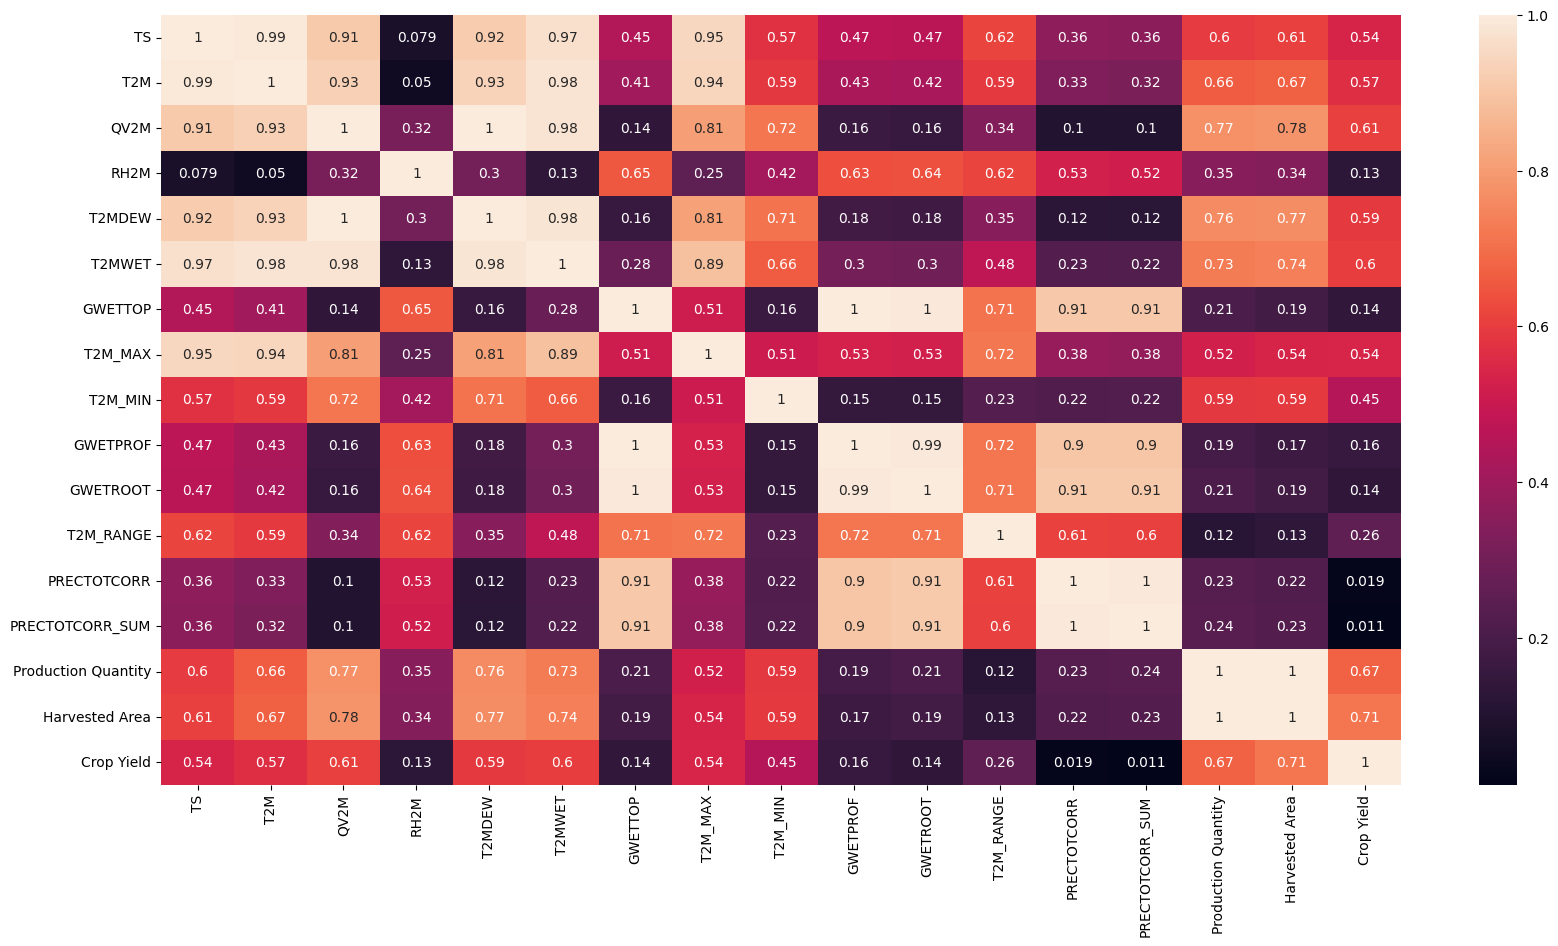

In [349]:
# checking correlation between feature with heatmap

plt.figure(figsize=(20, 10))

cor = data_smogn.corr().abs()
sns.heatmap(cor, annot=True)
plt.show()

In [350]:
# only using certain feature with ammount of correlation

cor_target = abs(cor['Crop Yield'])
relevant_features = cor_target[cor_target > 0.2]
feature_names = [index for index, value in relevant_features.iteritems()]

feature_names.remove('Crop Yield')

print(feature_names)
print(len(feature_names))

['TS', 'T2M', 'QV2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'Production Quantity', 'Harvested Area']
10


C:\Users\malik\AppData\Local\Temp\ipykernel_14436\1477983373.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  feature_names = [index for index, value in relevant_features.iteritems()]


In [351]:
# splitting Training and Testing data

from sklearn.model_selection import train_test_split

x = data_smogn.loc[:,feature_names]
y = data_smogn['Crop Yield']

# shuffle must be true if not result bad
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.1, random_state=20, shuffle=True)

In [352]:
test_target_df = pd.DataFrame(y_test.reset_index(drop=True))

Decision Tree

In [353]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=100)

decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=100)

In [354]:
decision_tree_pred = decision_tree.predict(x_test)

In [355]:
# make dataframe from predction

decision_tree_pred_df = pd.DataFrame(decision_tree_pred)

In [356]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

metric_eval = {}

mse = mean_squared_error(y_test, decision_tree_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, decision_tree_pred)
mae = mean_absolute_error(y_test, decision_tree_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, decision_tree_pred))

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^: {r2}')
print(f'RMSLE: {rmsle}')

# insrt to dataframe
metric_eval['Decision Tree'] = mse, rmse, mae, r2, rmsle

MSE: 0.0048470291041075855
RMSE: 0.0696206083290543
MAE: 0.030161554209386043
R^: 0.6383448005693444
RMSLE: 0.005293886697486756


Text(0.5, 1.0, 'Decision Tree\nMSE: 0.0048470291041075855')

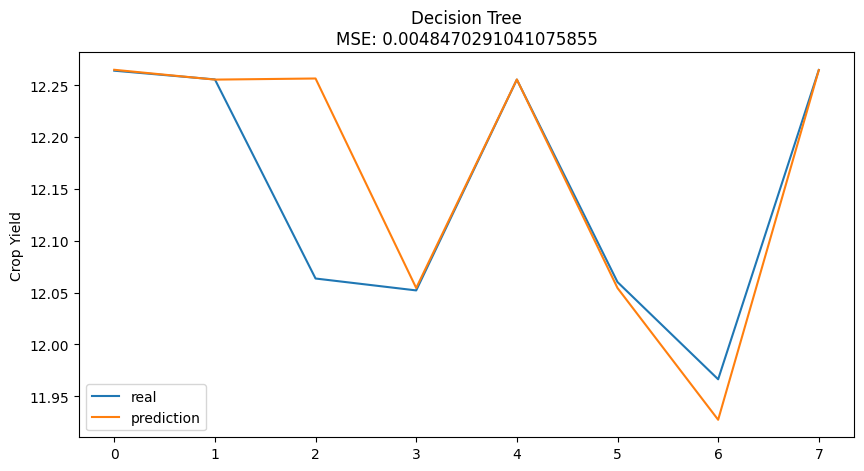

In [357]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot((y_test.reset_index(drop=True)), label='real')
ax = sns.lineplot(decision_tree_pred, label='prediction')

ax.set_title(f'Decision Tree\nMSE: {mse}')

Ada Boost

In [358]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor()

adaboost.fit(x_train, y_train)

AdaBoostRegressor()

In [359]:
ada_pred = adaboost.predict(x_test)

In [360]:
# make dataframe from predction

ada_pred_df = pd.DataFrame(ada_pred)

In [361]:
mse = mean_squared_error(y_test, ada_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ada_pred)
mae = mean_absolute_error(y_test, ada_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, ada_pred))

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^: {r2}')
print(f'RMSLE: {rmsle}')

metric_eval['AdaBosst'] = mse, rmse, mae, r2, rmsle

MSE: 0.0017917640971135296
RMSE: 0.042329234544384683
MAE: 0.02663306990847847
R^: 0.8663096944631222
RMSLE: 0.003241716759592805


Text(0.5, 1.0, 'Decision Tree\nMSE: 0.0017917640971135296')

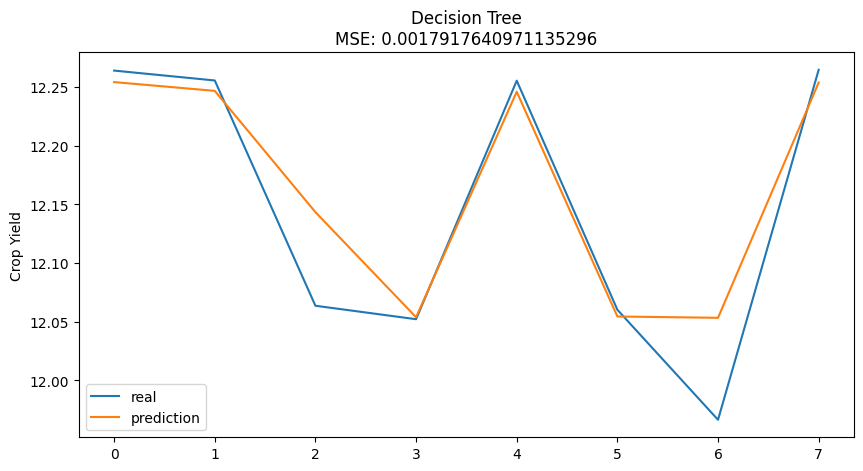

In [362]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot((y_test.reset_index(drop=True)), label='real')
ax = sns.lineplot(ada_pred, label='prediction')

ax.set_title(f'Decision Tree\nMSE: {mse}')

EXTRA TREE

In [363]:
from sklearn.tree import ExtraTreeRegressor

extratree = ExtraTreeRegressor()

extratree.fit(x_train, y_train)

ExtraTreeRegressor()

In [364]:
extra_pred = extratree.predict(x_test)

In [365]:
# make dataframe from predction

extra_pred_df = pd.DataFrame(extra_pred)

In [366]:
mse = mean_squared_error(y_test, extra_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, extra_pred)
mae = mean_absolute_error(y_test, extra_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, extra_pred))

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^: {r2}')
print(f'RMSLE: {rmsle}')

metric_eval['Extra TREE'] = mse, rmse, mae, r2, rmsle

MSE: 0.004908111844722753
RMSE: 0.07005791778751887
MAE: 0.027847552487846983
R^: 0.6337871859430513
RMSLE: 0.005362279818498724


Text(0.5, 1.0, 'Decision Tree\nMSE: 0.004908111844722753')

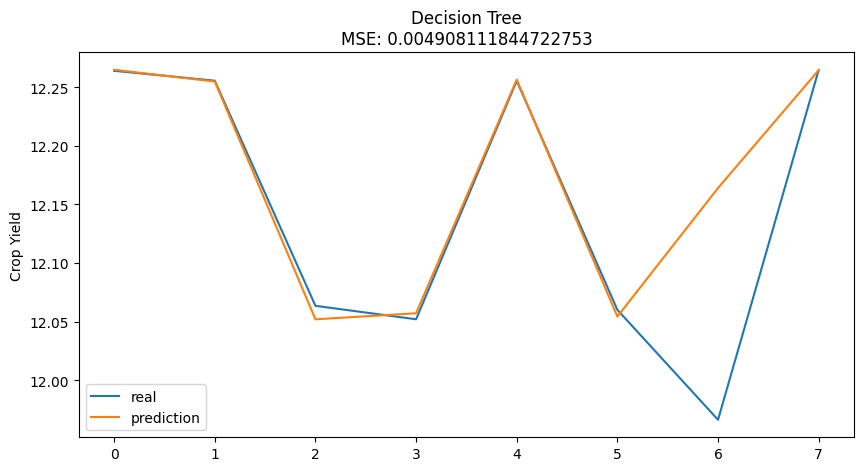

In [367]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot((y_test.reset_index(drop=True)), label='real')
ax = sns.lineplot(extra_pred, label='prediction')

ax.set_title(f'Decision Tree\nMSE: {mse}')

RANDOM FOREST

In [368]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(max_depth=100)

random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=100)

In [369]:
random_pred = random_forest.predict(x_test)

In [370]:
# make dataframe from predction

randomF_df = pd.DataFrame(random_pred)

In [371]:
mse = mean_squared_error(y_test, random_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, random_pred)
mae = mean_absolute_error(y_test, random_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, random_pred))

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^: {r2}')
print(f'RMSLE: {rmsle}')

metric_eval['Random Forest'] = mse, rmse, mae, r2, rmsle

MSE: 0.004773753502125172
RMSE: 0.06909235487465434
MAE: 0.04203929510864102
R^: 0.6438121707623341
RMSLE: 0.0052819287836518005


Text(0.5, 1.0, 'Decision Tree\nMSE: 0.004773753502125172')

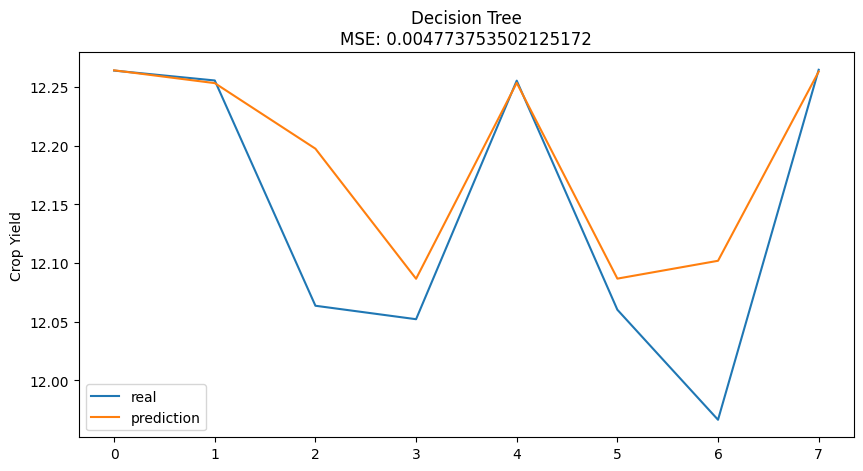

In [372]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot((y_test.reset_index(drop=True)), label='real')
ax = sns.lineplot(random_pred, label='prediction')

ax.set_title(f'Decision Tree\nMSE: {mse}')

GRADIENBOOSTING

In [373]:
from sklearn.ensemble import GradientBoostingRegressor

grad_model = GradientBoostingRegressor()

grad_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [374]:
grad_pred = grad_model.predict(x_test)

In [375]:
# make dataframe from predction

grad_pred_df = pd.DataFrame(grad_pred)

In [376]:
mse = mean_squared_error(y_test, grad_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, grad_pred)
mae = mean_absolute_error(y_test, grad_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, grad_pred))

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^: {r2}')
print(f'RMSLE: {rmsle}')

metric_eval['Gradient Boosting'] = mse, rmse, mae, r2, rmsle

MSE: 0.0019074171432594956
RMSE: 0.043673987031864814
MAE: 0.025582971350079253
R^: 0.8576803826578276
RMSLE: 0.003339408032799624


Text(0.5, 1.0, 'Decision Tree\nMSE: 0.0019074171432594956')

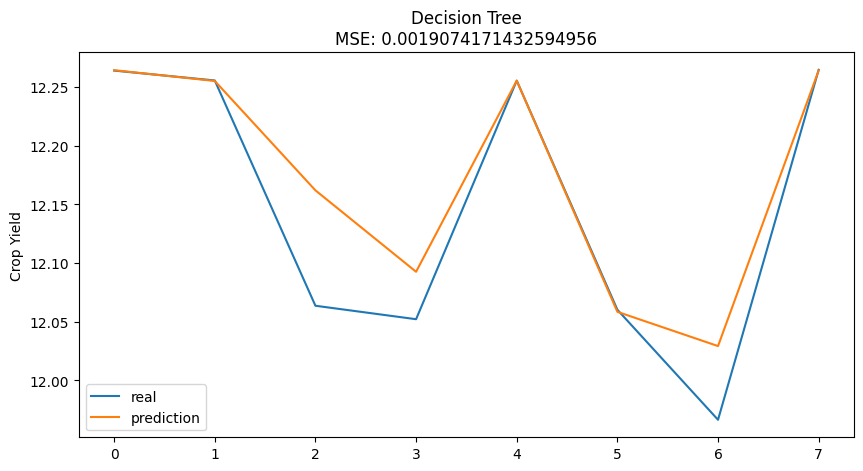

In [377]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot((y_test.reset_index(drop=True)), label='real')
ax = sns.lineplot(grad_pred, label='prediction')

ax.set_title(f'Decision Tree\nMSE: {mse}')

METRIC

In [378]:
metric_df = pd.DataFrame(data=metric_eval, index=['MSE', 'RMSE', 'MAE', 'R^', 'RMSLE'])
metric_df.transpose()

,MSE,RMSE,MAE,R^,RMSLE
Decision Tree,0.004847,0.069621,0.030162,0.638345,0.005294
AdaBosst,0.001792,0.042329,0.026633,0.866310,0.003242
Extra TREE,0.004908,0.070058,0.027848,0.633787,0.005362
Random Forest,0.004774,0.069092,0.042039,0.643812,0.005282
Gradient Boosting,0.001907,0.043674,0.025583,0.857680,0.003339


In [379]:
# expoerting all necesary data frame to CSV

from pathlib import Path

filepath = Path('/kampus/S2/Big Data Analytics/project/final/dashboard/data')

unnormalized_data = np.expm1(data)
unnormalized_data.to_csv((f'{filepath}/unnormalized_data.csv'))

data.to_csv((f'{filepath}/data.csv'))
data_smogn.to_csv((f'{filepath}/augmented_data.csv'))

test_target_df.to_csv((f'{filepath}/target.csv'))

decision_tree_pred_df.to_csv((f'{filepath}/decisiontree_pred.csv'))
ada_pred_df.to_csv((f'{filepath}/adaboost_pred.csv'))
extra_pred_df.to_csv((f'{filepath}/extratree_pred.csv'))
randomF_df.to_csv((f'{filepath}/randomF_pred.csv'))
grad_pred_df.to_csv((f'{filepath}/gradientboost_pred.csv'))

metric_df.to_csv((f'{filepath}/metric.csv'))
